## **Principal Component Analysis(PCA)**

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [36]:
from sklearn.datasets import load_iris

In [37]:
iris=load_iris()

In [38]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [39]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [40]:
df=pd.DataFrame(iris['data'],columns=iris['feature_names'])

In [41]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler=StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
scaled_data=scaler.transform(df)

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca=PCA(n_components=2)

In [47]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [48]:
x_pca=pca.transform(scaled_data)

In [49]:
scaled_data.shape

(150, 4)

In [50]:
x_pca.shape

(150, 2)

Text(0, 0.5, 'Second principle component')

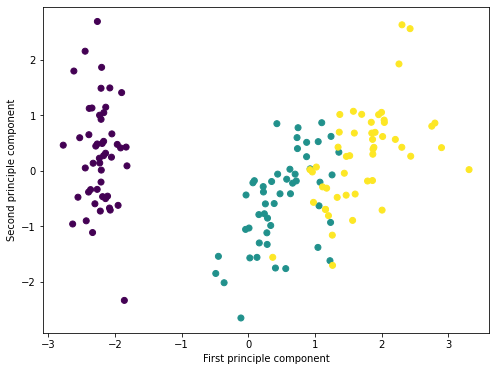

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=iris['target'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')





## **cluster analysis**

In [52]:
from sklearn.cluster import KMeans

In [53]:
kmeans = KMeans(n_clusters=3)

In [54]:
kmeans.fit(x_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
clusters=kmeans.cluster_centers_

In [56]:
print(clusters)

[[ 0.57262144 -0.80720888]
 [-2.22475316  0.28892745]
 [ 1.72103664  0.60288719]]


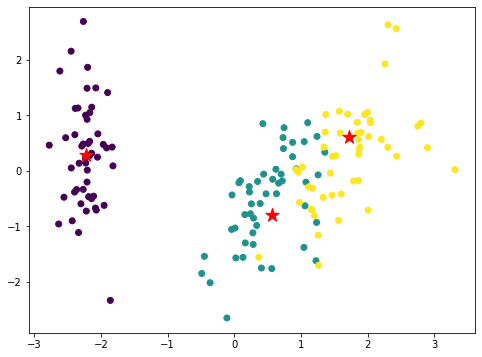

In [57]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=boston['target'])
plt.scatter(clusters[0][0], clusters[0][1], marker='*',s=200,color='red')
plt.scatter(clusters[1][0], clusters[1][1], marker='*',s=200,color='red')
plt.scatter(clusters[2][0], clusters[2][1], marker='*',s=200,color='red')


## **linear regression analysis**

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
linger=LinearRegression()

In [60]:
column_values=["x","y"]
df = pd.DataFrame(data = x_pca, 
                  columns = column_values)

x=df['x']
x=x.values.reshape(-1,1)


In [61]:
y=df['y']
y

0      0.480027
1     -0.674134
2     -0.341908
3     -0.597395
4      0.646835
         ...   
145    0.386966
146   -0.896687
147    0.269069
148    1.011254
149   -0.024332
Name: y, Length: 150, dtype: float64

In [62]:
linger.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_presit=linger.predict(x)

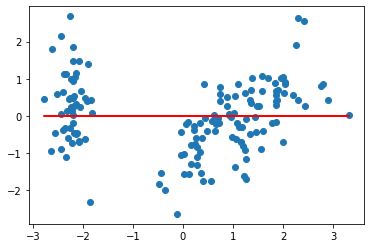

In [64]:
plt.scatter(x,y)
plt.plot(x,y_presit,color='red')